# 3. Descrição das atividades 
Implementar três classificadores de dígitos contidos no dataset MNIST, utilizando os três 
modelos lineares de Aprendizagem de Máquina (AM) estudados: Perceptron, Regressão 
Linear e Regressão Logística. Detalhes da implementação estão descritas a seguir.

## 3.1. Redução da dimensão das amostras 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import sklearn
import random

In [2]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

### Intensidade

In [3]:
def intensidade(data):
    intensidade = []
    data = np.array(data)
    for i in range(len(data)):
        intensidade.append(sum(data[i])/255)#somatorio da linha divido por 255
    return intensidade

### Simetria

In [4]:
#mudança pra velocidade foi apenas fazer com np array
def simetria(data):
    list_simetria = []
    data = np.array(data)
    for k in range(len(data)):#pular linha
        soma_line_horizontal = 0
        soma_line_vertical = 0
        tamanho = len(data[k])
        
        for i in range(28):#vertical
            for j in range(14):#entre pixels das metades  
                img_inicial = data[k][28*i+j]
                img_final = data[k][28*i+(27-j)]
                soma_line_vertical += abs(img_inicial - img_final)
        
        for i in range(tamanho-1,int(tamanho/2),-1):#horizontal do fim até a metade iterando com -1
            img_inicial = data[k][i]
            img_final = data[k][abs(i-tamanho)]
            soma_line_horizontal += abs(img_inicial - img_final)
            
        soma = (soma_line_vertical+soma_line_horizontal)/2
        list_simetria.append(soma/255)
    
    return list_simetria

### Train_redu.csv Teste_redu.csv

In [5]:
def reduced(filepath):#reduzir um arquivo usando simetria e intensidade
    data =  read_instance(filepath)
    label = data['label']
    data = data.drop(columns=['Unnamed: 0'])
    data = data.drop(columns=['label'])
    intensidade_data = intensidade(data)
    simetria_data = simetria(data)
    redu_data = pd.DataFrame({'Label':label,'intensidade': intensidade_data,'simetria': simetria_data})
    return redu_data

In [6]:
#recebe arquivo csv reduz e tranforma em csv novamente 
'''train = reduced("train.csv")
train.to_csv("train_redu.csv")
test = reduced("test.csv")
test.to_csv("test_redu.csv")'''


'train = reduced("train.csv")\ntrain.to_csv("train_redu.csv")\ntest = reduced("test.csv")\ntest.to_csv("test_redu.csv")'

In [7]:
train_redu = read_instance("train_redu.csv")
train_redu = train_redu.drop(columns=["Unnamed: 0"])

In [8]:
test_redu = read_instance("test_redu.csv")
test_redu = test_redu.drop(columns=["Unnamed: 0"])

>Realizar um filtro nos dados dos arquivos train_redu.csv e test_redu.csv, deixando apenas as imagens com valores 1 ou 5 na coluna label, construindo as instâncias  train1x5 e test1x5;

## Classificação dos dígitos 1 x 5 

### Realizar um filtro 1x5

In [9]:
values = [1,5]

In [10]:
train = train_redu[train_redu.Label.isin(values)]
test = test_redu[test_redu.Label.isin(values)]

In [11]:
x_train, y_train = train.drop(columns=['Label']) , train['Label']
y_train = y_train.values.reshape(-1,1)
x_train = np.column_stack((np.ones((x_train.shape[0],1)),x_train,))

In [12]:
x_test, y_test = test.drop(columns=['Label']), test['Label']
y_test = y_test.values.reshape(-1,1)
x_test = np.column_stack((np.ones((x_test.shape[0],1)),x_test))

### Plotar os dados de train1x5

In [13]:
def plot1x5(x,y):

    figure = plt.figure(figsize=(18,10))
    axis = figure.add_subplot(111)
    axis.scatter(x.values[:,1], x.values[:,2], color='red',marker='o',label = 5)
    axis.scatter(y.values[:,1], y.values[:,2], color='blue',marker='o',label = 1)
    axis.legend(loc="best")
    plt.xlabel('intensidade')
    plt.ylabel('simetria')
    #axis.legend(loc='upper left')
    #axis.show()

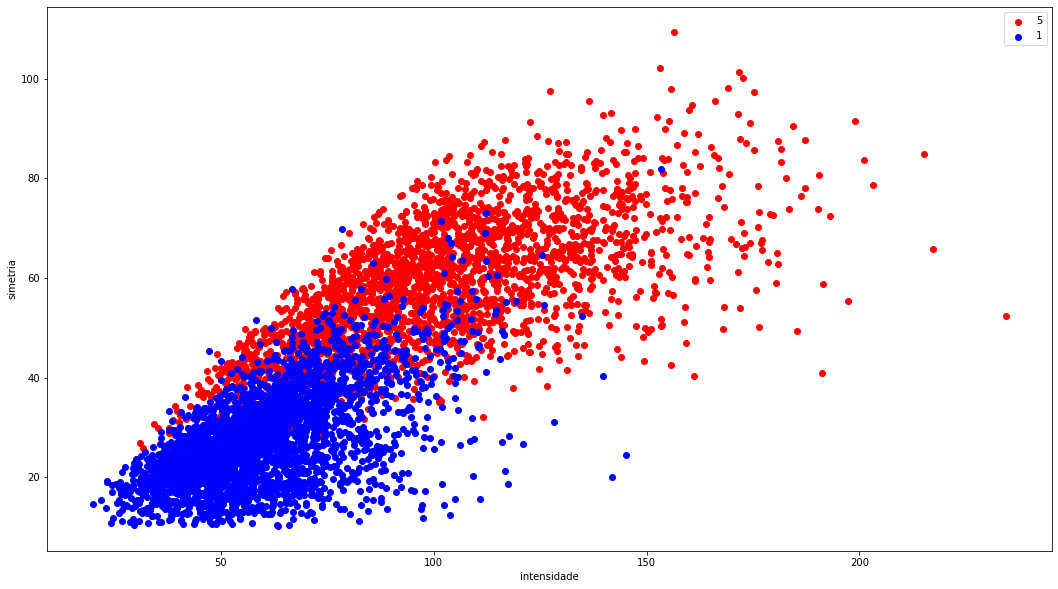

In [14]:
cinco = [5]
um = [1]
trainx5 = train_redu[train_redu.Label.isin(cinco)]
#testx5 = test_redu[test_redu.Label.isin(cinco)]
trainx1 = train_redu[train_redu.Label.isin(um)]
#testx1 = test_redu[test_redu.Label.isin(um)]
plot1x5(trainx5,trainx1)

# Começo da atualização

## Perceptron 

In [15]:
class perceptron:
    def __init__(self, n_iter):
        self.n_iter = n_iter
    
    def predict(self, x):
       
        net = np.dot(x, self.w_[1:] + self.w_[0])
        return np.where(net>=0.0, 5, 1)

    
    def fit(self, x, y):
        self.w_ = np.zeros(1+x.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
    def get_w_(self):
        return self.w_
    
    

In [17]:
ppn = perceptron( n_iter = 10)

In [19]:
ppn.fit(x_train,y_train)
y_pred = ppn.predict(x_test)

In [20]:
mc = confusion_matrix(y_test.ravel(), y_pred)
print('consufion matrix\n',mc,'\n---------------------------------------------------------------')
print('classification report\n',sklearn.metrics.classification_report(y_test,y_pred,zero_division= 0))

consufion matrix
 [[1179  349]
 [  49 1275]] 
---------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           1       0.96      0.77      0.86      1528
           5       0.79      0.96      0.86      1324

    accuracy                           0.86      2852
   macro avg       0.87      0.87      0.86      2852
weighted avg       0.88      0.86      0.86      2852



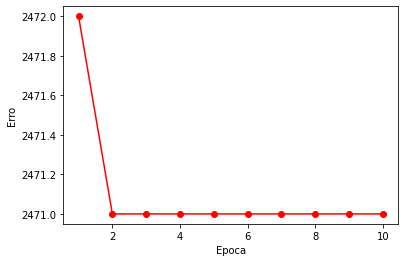

In [123]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker = 'o', color='red')
plt.xlabel('Epoca')
plt.ylabel('Erro')
plt.show()

In [21]:
data = pd.DataFrame(np.column_stack((x_test,y_pred)), columns=['x0','x1','x2','class'])

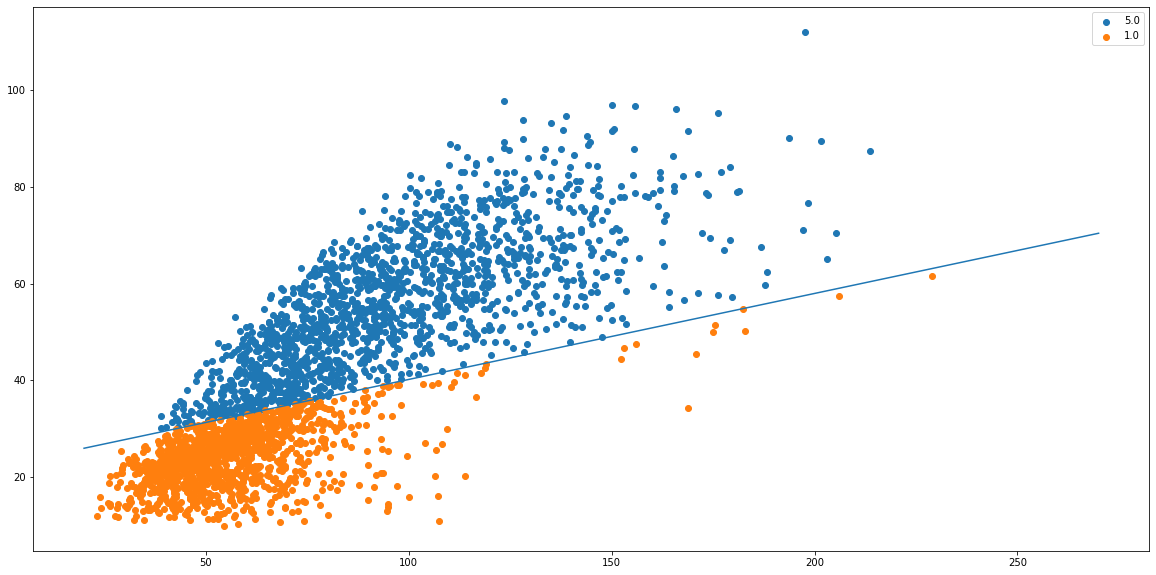

In [22]:
classes = data['class'].unique()
w = ppn.w_[1:] + ppn.w_[0]
figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)

x_new = np.linspace(20,270,1000)

plt.plot(x_new, (-w[0] - w[1]*x_new)/w[2])
    
axis.legend()


## Regressão Linear

In [23]:
class LinearRegression_2:#correta
    def fit(self, x_train, y_train):
        x = np.array(list(map(lambda i: [1, i[1], i[2]], x_train)))


        x =  np.array(x)
        y =  np.array(y_train)
        xTx = np.dot(x.transpose(), x)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot( inverse, x.transpose()), y)

    def predict(self, x_test):

        x = np.array(list(map(lambda i: [1, i[1], i[2]], x_test)))

        return np.sign([np.dot(xn,self.w) for xn in x])

    def get_w(self):
        return self.w

In [24]:
def value_changer(y_train):
    new_y_train = np.where(y_train == 1,1,-1)
    return new_y_train.reshape(-1,1)

In [25]:
new_y_train = value_changer(y_train)# trocando os numeros por menos -1 e 1
lr = LinearRegression_2()

In [26]:
lr.fit(x_train,new_y_train)
y_pred_lr = lr.predict(x_test)

In [27]:
mc = confusion_matrix(value_changer(y_test), y_pred_lr.ravel())
display(mc)

array([[1155,  169],
       [  92, 1436]], dtype=int64)

In [28]:
print(sklearn.metrics.classification_report(value_changer(y_test),y_pred_lr))

              precision    recall  f1-score   support

          -1       0.93      0.87      0.90      1324
           1       0.89      0.94      0.92      1528

    accuracy                           0.91      2852
   macro avg       0.91      0.91      0.91      2852
weighted avg       0.91      0.91      0.91      2852



In [29]:
data = pd.DataFrame(np.column_stack((x_test,y_pred_lr)), columns=['x0','x1','x2','class'])

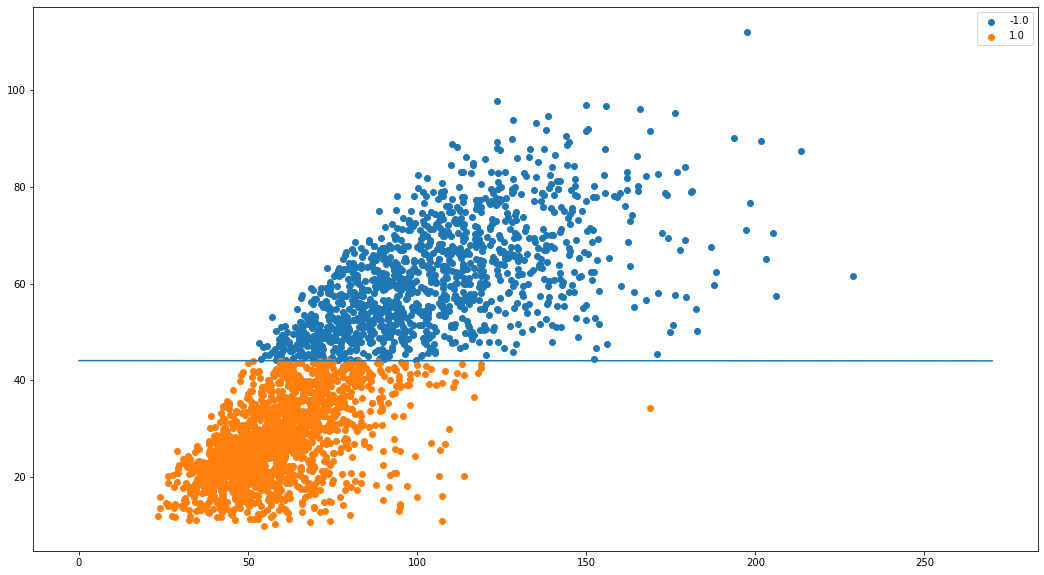

In [30]:
classes = data['class'].unique()

figure = plt.figure(figsize=(18,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)

x_new = np.linspace(0,270,1000)

plt.plot(x_new, (-lr.get_w()[0] - lr.get_w()[1]*x_new)/lr.get_w()[2])
    
    
axis.legend()

## OVR sem sklearning

In [44]:
#criando x_train y_train x_test y_test para ovr
values_ovr = [1,5,8]
train_ovr = train_redu[train_redu.Label.isin(values_ovr)]
test_ovr = test_redu[test_redu.Label.isin(values_ovr)]

x_train_ovr, y_train_ovr = test_ovr.drop(columns=['Label']) , train_ovr['Label']
y_train_ovr = y_train_ovr.values.reshape(-1,1)
x_train_ovr = np.column_stack((np.ones((x_train_ovr.shape[0],1)),x_train_ovr))

x_test_ovr, y_test_ovr = test_ovr.drop(columns=['Label']), test_ovr['Label']
y_test_ovr = y_test_ovr.values.reshape(-1,1)
x_test_ovr = np.column_stack((np.ones((x_test_ovr.shape[0],1)),x_test_ovr))



In [45]:
train_ovr

,Label,intensidade,simetria
0,1,65.290196,33.627451
1,1,52.647059,10.517647
6,8,167.054902,87.572549
8,1,48.411765,18.380392
20,1,46.854902,27.227451
...,...,...,...
27759,8,83.835294,63.105882
27763,5,113.349020,47.270588
27765,5,121.035294,57.349020
27767,1,84.964706,22.294118


### 1 vs rest

In [54]:
y_train_ovr_1 = np.where(y_train_ovr.ravel()== 1,1,-1)
y_test_ovr_1 = np.where(y_test_ovr.ravel()== 1,1,-1)

In [55]:
y_train_ovr_1

array([ 1,  1, -1, ..., -1,  1,  1])

In [56]:
ppn = perceptron( n_iter = 10)

In [57]:
ppn.fit(x_train_ovr,y_train_ovr_1)

In [58]:
y_pred_ovr = ppn.predict(x_test_ovr)

In [59]:
mc = confusion_matrix(y_test_ovr_1, y_pred_ovr)
print('consufion matrix\n',mc,'\n---------------------------------------------------------------')
print('classification report\n',sklearn.metrics.classification_report(y_test_ovr,y_pred_ovr,zero_division= 0) )

consufion matrix
 [[   0 2697]
 [   0 1528]] 
---------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           1       0.36      1.00      0.53      1528
           5       0.00      0.00      0.00      1324
           8       0.00      0.00      0.00      1373

    accuracy                           0.36      4225
   macro avg       0.12      0.33      0.18      4225
weighted avg       0.13      0.36      0.19      4225



In [60]:
data = pd.DataFrame(np.column_stack((x_test_ovr,y_pred_ovr)), columns=['x0','x1','x2','class'])

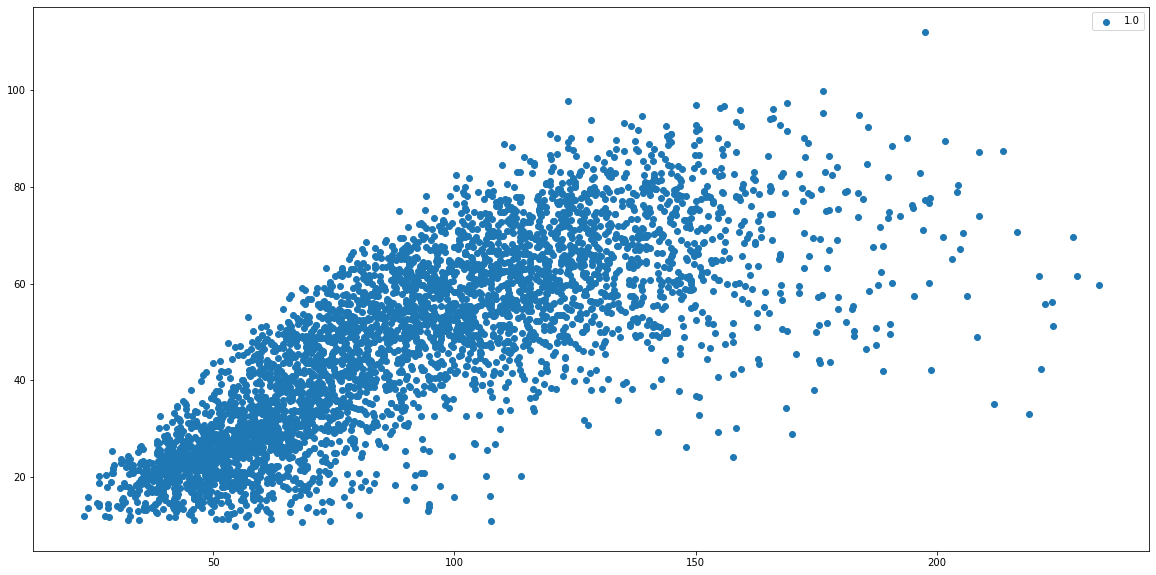

In [61]:
classes = data['class'].unique()

figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)
    
axis.legend()

# fim da atualização

In [42]:
pla = Perceptron(tol=0.1,max_iter=100)

Atribuir o valor alvo 
𝑦 = +1 para a imagem com valor 𝑙𝑎𝑏𝑒𝑙 = 1 e 𝑦 = −1 para 𝑙𝑎𝑏𝑒𝑙 = 5; 

In [43]:
y_train = np.where(train1x5['Label']== 1,1,-1)
y_test = np.where(test1x5['Label']== 1,1,-1)
pla.fit(x_train, y_train.ravel())# x= caracteristicas(simetria,intensidade) y = label

NameError: name 'train1x5' is not defined

Criar um método de predição do dígito que retorne o valor 1 quando o 
classificador linear classificar a saída como 𝑦 = +1 e retorne o valor 5 quando 𝑦 =
−1;

In [ ]:
def pre1x5(x):
    if (pla.predict([x]) == -1):
        return int(5)
    elif(pla.predict([x]) == 1):
        return int(1)

In [ ]:
pre1x5(x_train[1]) == y_train[1]

# Sklearning

## Perceptron

In [ ]:
pla = Perceptron(tol=0.1,max_iter=100)
pla.fit(x_train, y_train)
y_predtest_pla = pla.predict(x_test)

### Matriz de confusão e relatório de eficácia Perceptron

In [ ]:
y_predtest_pla = pla.predict(x_test)
mc = confusion_matrix(y_test, y_predtest_pla)
display(mc)

In [ ]:
print(sklearn.metrics.classification_report(y_test,y_predtest_pla))

## Linear regression sklearning


In [ ]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)



### Matriz de confusão e relatório de eficácia Regressão linear

In [ ]:
y_predtest_linear = np.sign(lr2.predict(x_test))
confusion_matrix(y_test,y_predtest_linear)

In [ ]:
print(sklearn.metrics.classification_report(y_test,y_predtest_linear))

## Logistic Regression

In [ ]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

### Matriz de confusão e relatório de eficácia Regressão logistica

In [ ]:
y_predtest_logistic = lg.predict(x_test)
confusion_matrix(y_test,y_predtest_logistic)

In [ ]:
print(sklearn.metrics.classification_report(y_test,y_predtest_logistic))

## 3.3. Classificador de dígitos completo 


In [ ]:
x_train, y_train = train_redu.drop(columns=['Label']), train_redu['Label']
x_test, y_test = test_redu.drop(columns=['Label']), test_redu['Label']

### Logistic Regression 'One-vs-Rest'

In [ ]:
ovr_logistic = LogisticRegression(multi_class='ovr')
ovr_logistic.fit(x_train, y_train)

In [ ]:
y_pred_logistic = ovr_logistic.predict(x_test)
score_ovr_logistic = ovr_logistic.score(x_test,y_test)

In [ ]:
acuracia_ovr_logistic= sklearn.metrics.accuracy_score(y_test,y_pred_logistic)
#precisao_ovr_logistic=sklearn.metrics.precision_score(y_test,y_pred_logistic)
#recall_ovr_logistic=sklearn.metrics.recall_score(y_test,y_pred_logistic)
#f1_ovr_logistic=sklearn.metrics.f1_score(y_test,y_pred_logistic)

In [ ]:
confusion_matrix(y_test,y_pred_logistic)

In [ ]:
acuracia_ovr_logistic

In [ ]:
#como diferenciar falso positivos de negativo em uma matriz 10x10?

### Linear Regression 'One-vs-Rest'

In [ ]:
linear_model = LinearRegression()
ovr_linear = OneVsRestClassifier(linear_model)
ovr_linear.fit(x_train,y_train)

In [ ]:
y_pred_linear = ovr_linear.predict(x_test)
confusion_matrix(y_test,y_pred_linear)

In [ ]:
ovr_linear.score(x_test,y_test)

### Perceptron 'One-vs-Rest'

In [ ]:
pla_model = Perceptron()
ovr_pla = OneVsRestClassifier(pla_model)
ovr_pla.fit(x_train,y_train)

In [ ]:
y_pred_pla = ovr_pla.predict(x_test)
confusion_matrix(y_test,y_pred_pla)

In [ ]:
ovr_pla.score(x_test,y_test)